## Example K nearest neighbour (KNN) in Python<br>
<br>

**0) Loading Libraries**<br>
<br>

In [1]:
#standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
from plot_entropy_and_confusion import *           #importing a small package for plotting the confusion matrix and entropy
from sklearn import datasets                       #we want to work with an internal data set
from sklearn.neighbors import KNeighborsClassifier #performs actual k nearest
from pyclustering.utils.metric import *            #for importing any metric

<br>

**1) Loading and Inspecting the Data**<br>
<br>

We want to work with the so-called *iris* data set. Iris are a certain kind of orchids which can be classified based on their blossum leafs: the sepals and petals:
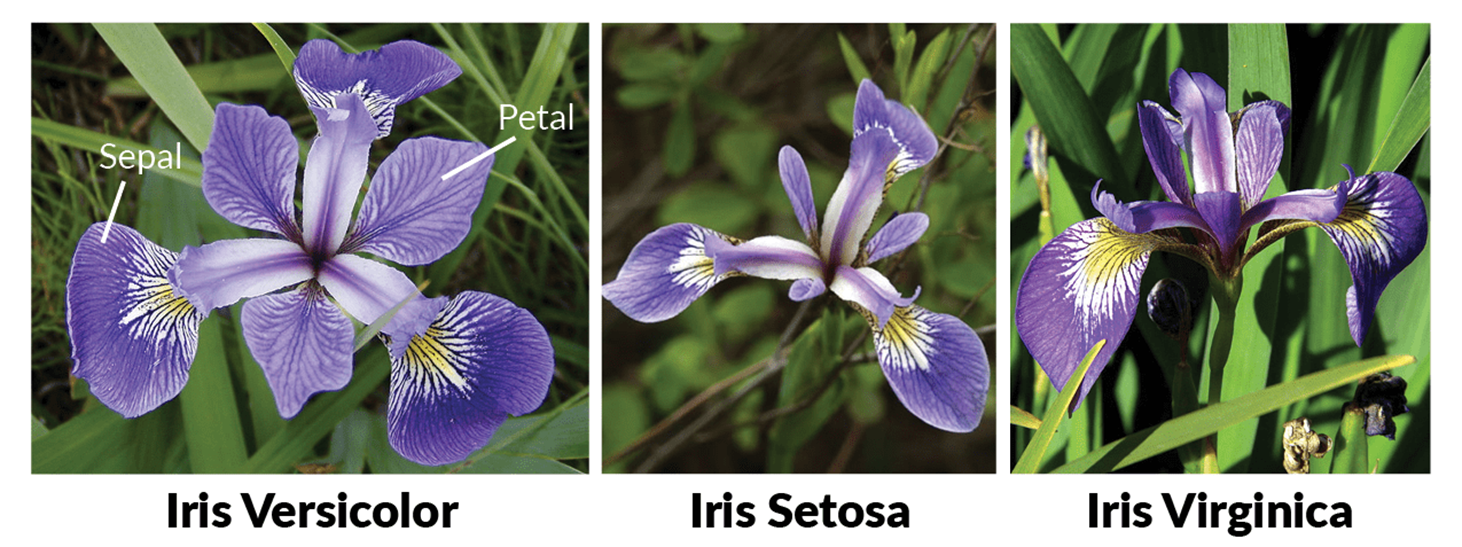

Let's start with the description:

In [5]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

The X values (= the features) are the sepal lengths/widths and petal lengths/widths on which we want to predict the kind of iris (Setosa, Versicolour or Virginica). The kind is the Y vector. 

In [7]:
Labels = iris.target_names
print(Labels)

['setosa' 'versicolor' 'virginica']


In [9]:
X = iris.data
print(X.shape)

(150, 4)


In [11]:
Y = iris.target
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<br>

**2) Plotting the Data**<br>
<br>

The first 50 entries in the data refer to Setosa, the next 50 entries refer to Versicolour etc. The data set is 4D. For plotting purposes, let's take a look at two dimensions each:

In [13]:
X12 = X[:,0:2]
X23 = X[:,1:3]
X34 = X[:,2:]

Color = ["#1B9E77", "#D95F02", "#7570B3"]

a) first two coordinates:

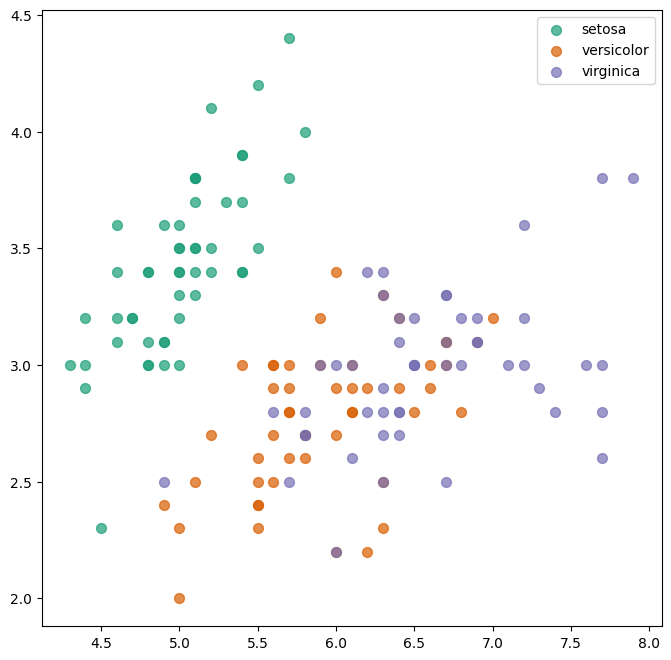

In [15]:
fig, ax = plt.subplots(figsize = (8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X12[idxs,0], X12[idxs,1], label = species, s = 50, color = color, alpha = 0.7)
ax.legend()
plt.show()

b) second and third coordinate:

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X23[idxs,0], X23[idxs,1], label = species, s = 50, color = color, alpha = 0.7)
ax.legend()
plt.show()

c) last two coordinates:

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X34[idxs,0], X34[idxs,1], label = species, s = 50, color = color, alpha = 0.7)
ax.legend()
plt.show()

<br>

**3) Running KNN**<br>
<br>

a) Again, we start with one of the 2D data sets in order to be able to plot the result. 
1) setting up the model<br>

In [17]:
k   = 5
out = KNeighborsClassifier(k, metric = distance_metric(type_metric.EUCLIDEAN))

2. fitting the model with training data 

In [19]:
X2D = X12 #2D data for visualization! You would normally work with the full 4D data set! 
Fit = out.fit(X2D, Y)

3. evaluating the fit

In [21]:
PredY = out.predict(X2D)
print(PredY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1
 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 1 2 2
 2 1 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2
 2 2]


In [23]:
accur = (PredY == Y).sum()/len(Y)
print(accur)

0.8333333333333334


In [25]:
#KNN prediction is pretty rough here
P = out.predict_proba(X2D)
print(P[:10,:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


We wan to plot the entropy and confusion matrix again:

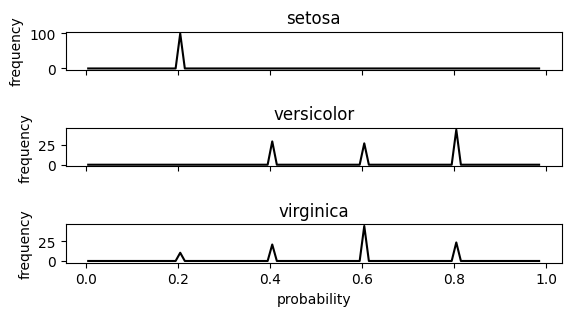

In [27]:
plot_entropy(P, Y, Labels, [0, 1, 2])

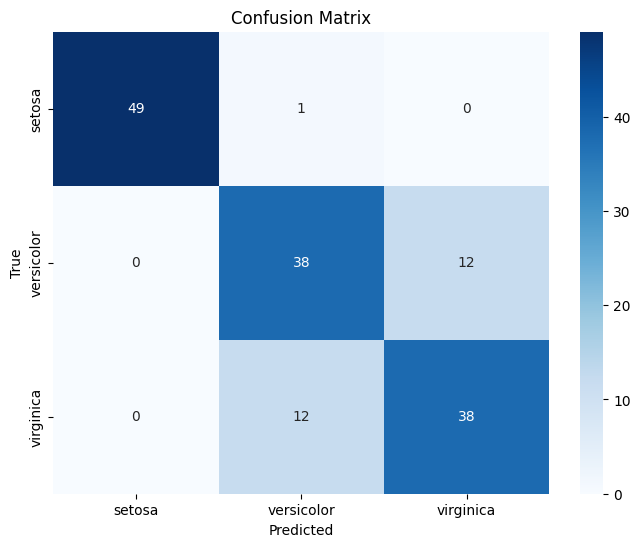

In [29]:
plot_confusion(PredY, Y, Labels)

4. applying the model to new data

In [31]:
Xnew  = np.array([[6, 3.5],[6.3, 4.5]])
ypred = out.predict(Xnew)
p     = out.predict_proba(Xnew)

In [33]:
print(Labels[ypred])
print(p)

['virginica' 'setosa']
[[0.  0.4 0.6]
 [1.  0.  0. ]]


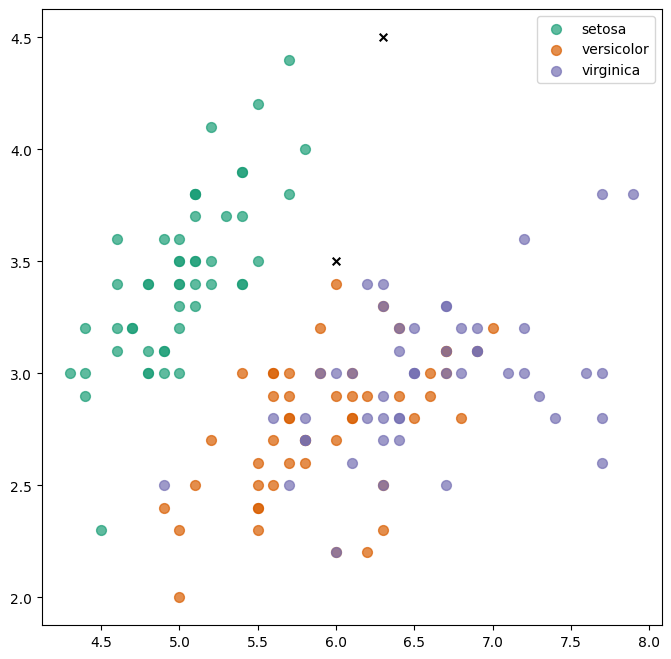

In [35]:
fig, ax = plt.subplots(figsize = (8,8))
i = 0
for species, color in zip(Labels, Color):
    idxs = np.arange(0,50) + 50*i
    i += 1
    ax.scatter(X2D[idxs,0], X2D[idxs,1], label = species, s = 50, color = color, alpha = 0.7)
ax.legend()
plt.scatter(Xnew[:,0], Xnew[:,1], s = 30, marker = 'x', c = 'k')
plt.show()

3b) Finally, lets run the complete analysis for the full 4D dataset and different **number of neighbours n**:

In [37]:
K   = np.arange(3,25)
Acc = np.zeros((len(K),))

In [39]:
for i, k in enumerate(K):

    out   = KNeighborsClassifier(k, metric = distance_metric(type_metric.EUCLIDEAN))
    Fit   = out.fit(X, Y)
    P     = out.predict_proba(X)
    PredY = out.predict(X)
    Acc[i] = (PredY == Y).sum()/len(Y)

Text(0, 0.5, 'accuracy [%]')

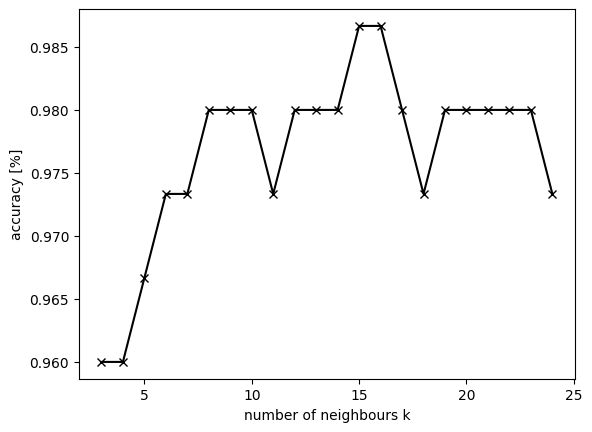

In [41]:
plt.plot(K, Acc, 'k-x')
plt.xlabel('number of neighbours k')
plt.ylabel('accuracy [%]')